In [1]:
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# Définir le nombre de points de données
n = 300

# Variable de contrôle du nombre de variable manquante
missing_samples = [x for x in range(300)]

#Matrice d'observations
data_missing = []
index = np.random.randint(0,299, 50)

# Définir les limites de l'espace dans lequel les données doivent être générées
x_min, x_max = 0, 10
y_min, y_max = 0, 10

# Générer les coordonnées x et y aléatoires dans les limites définies
x = np.random.uniform(x_min, x_max, n)
y = np.random.uniform(y_min, y_max, n)

# Regrouper les coordonnées x et y pour former un tableau de données bidimensionnelles
data = np.column_stack((x,y))

data_missing = data.copy()

# Matrice d'observation data missing
for i in index:
    data_missing[i][1] = np.nan

for i in range(len(data)):
    if(math.isnan(data[i][1])):
        missing_samples[i] = True
    else:
        missing_samples[i] = False

c_nanmean = np.nanmean(data[:,1])
print("c_meanan =", c_nanmean)

c_meanan = 5.2767295147324145


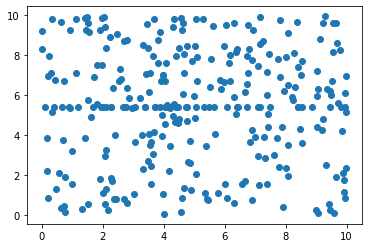

Erreur avec imputation par la moyenne =  1.54


In [2]:
# Imputation par la moyenne
"""
for i in range(len(data_missing)):
    if(math.isnan(data_missing[i][1])):
        data_missing[i][1] = c_nanmean
"""

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
d_m = imputer.fit_transform(data_missing)

#Visualisation dans le plan (effet d'une ligne de 50 points ayant la même ordonnée)
plt.scatter(d_m[:,0],d_m[:,1])
plt.show()

# MSE
print("Erreur avec imputation par la moyenne = ", round(mean_squared_error(data[:,1], d_m[:,1]),2))


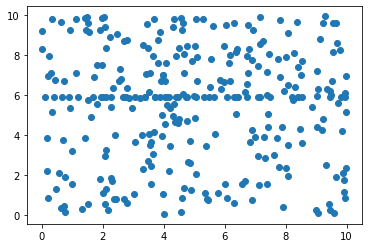

Erreur avec imputation par la médiane =  1.69


In [3]:
# Imputation par la médiane
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
d_m = imputer.fit_transform(data_missing)

#Visualisation dans le plan (effet d'une ligne de 50 points ayant la même ordonnée)
plt.scatter(d_m[:,0],d_m[:,1])
plt.show()

print("Erreur avec imputation par la médiane = ", round(mean_squared_error(data[:,1], d_m[:,1]),2))

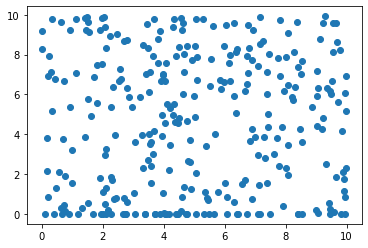

Erreur avec imputation par 0 = 4.56


In [4]:
# Imputation par 0
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
d_m = imputer.fit_transform(data_missing)

#Visualisation dans le plan (effet d'une ligne de 50 points ayant la même ordonnée)
plt.scatter(d_m[:,0],d_m[:,1])
plt.show()

print("Erreur avec imputation par 0 =", round(mean_squared_error(data[:,1], d_m[:,1]),2))

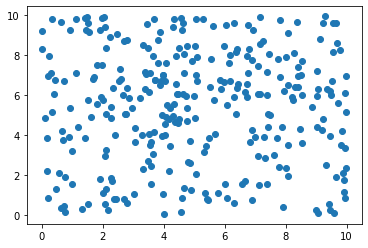

Erreur avec imputation par K-NN = 1.77


In [5]:

knnImputerMean = KNNImputer(missing_values = np.nan)
dataKNN = knnImputerMean.fit_transform(data_missing)

#Visualisation dans le plan (effet d'une ligne de 50 points ayant la même ordonnée)
plt.scatter(dataKNN[:,0],dataKNN[:,1])
plt.show()

print("Erreur avec imputation par K-NN =", round(mean_squared_error(data[:,1], dataKNN[:,1]),2))